https://huggingface.co/datasets/amazon_us_reviews

https://colab.research.google.com/github/huggingface/nlp/blob/master/notebooks/Overview.ipynb#scrollTo=aOXl6afcvSUu

In [ ]:
# install datasets
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 6.2 MB/s eta 0:00:00


https://huggingface.co/docs/hub/security-tokens

In [ ]:
from datasets import load_dataset

dataset = load_dataset("amazon_us_reviews", 'Apparel_v1_00')

Generating train split:   0%|          | 0/5906333 [00:00<?, ? examples/s]

Dataset amazon_us_reviews downloaded and prepared to /root/.cache/huggingface/datasets/amazon_us_reviews/Apparel_v1_00/0.1.0/17b2481be59723469538adeb8fd0a68b0ba363bbbdd71090e72c325ee6c7e563. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
shell = dataset['train']
shell

Dataset({
    features: ['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_body', 'review_date'],
    num_rows: 5906333
})

In [ ]:
shell['product_title'][10000]

'PianPian Cycling Shorts Biking Bicycle Bike Shorts Black Padded 138XXL'

In [ ]:
import pandas as pd
first_table = pd.DataFrame.from_dict(shell)


In [ ]:
first_table.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,32158956,R1KKOXHNI8MSXU,B01KL6O72Y,24485154,Easy Tool Stainless Steel Fruit Pineapple Core...,Apparel,4,0,0,0,1,★ THESE REALLY DO WORK GREAT WITH SOME TWEAKING ★,"These Really Do Work Great, But You Do Need To...",2013-01-14
1,US,2714559,R26SP2OPDK4HT7,B01ID3ZS5W,363128556,V28 Women Cowl Neck Knit Stretchable Elasticit...,Apparel,5,1,2,0,1,Favorite for winter. Very warm!,I love this dress. Absolute favorite for winte...,2014-03-04
2,US,12608825,RWQEDYAX373I1,B01I497BGY,811958549,James Fiallo Men's 12-Pairs Low Cut Athletic S...,Apparel,5,0,0,0,1,Great Socks for the money.,"Nice socks, great colors, just enough support ...",2015-07-12
3,US,25482800,R231YI7R4GPF6J,B01HDXFZK6,692205728,Belfry Gangster 100% Wool Stain-Resistant Crus...,Apparel,5,0,0,0,1,Slick hat!,"I bought this for my husband and WOW, this is ...",2015-06-03
4,US,9310286,R3KO3W45DD0L1K,B01G6MBEBY,431150422,JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...,Apparel,5,0,0,0,1,I would do it again!,Perfect dress and the customer service was awe...,2015-06-12


I used RegEx here to get only product titles containing "Pants" and gender.

https://regex101.com/

In [ ]:
#pants_table = first_table[first_table['product_title'].str.contains("pants", case=False) == True]
pant_table = first_table[first_table['product_title'].str.contains(r"\bpants\b", case=False) == True]

In [ ]:
pant_table.head()
#pants_table.info
#len(pant_table.index)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
31,US,502031,R3DYA1XAAIV459,B014K9ETKS,293334,COCOLEGGINGS Womens Fold Over Waist Wide Leg P...,Apparel,5,3,4,0,0,Five Stars,Great fit & love the print. Will probably orde...,2015-08-28
40,US,935737,R2YUKEUAXHYFLP,B014IZE8BO,494413845,Match Men's Athletic Fit Straight Leg Casual P...,Apparel,2,0,0,0,0,The pants were great! Just one thing,The pants were great! Just one thing...it wasn...,2015-08-28
49,US,5836158,RIIIRR460TAO4,B014EP20NG,977237860,Pink Queen&reg; Womens Fold Over Waist Loose W...,Apparel,5,1,1,0,0,So comfy! I usually just wear them around the ...,So comfy! I usually just wear them around the ...,2015-08-25
50,US,5836158,RH2ZBOTD7SZ56,B014EOWF0U,32244119,Pink Queen&reg; Womens High Waisted Loose Wide...,Apparel,5,3,3,0,0,Super comfortable and very cute,"Very cute, stretchy. I got the patten shown as...",2015-08-25
60,US,116651,RZ5GGNDPWNSZZ,B014CRMLQC,479117835,Yazubi Men's Chino Pants Kyle Slim-Tapered Cas...,Apparel,5,0,1,0,1,Five Stars,the best,2015-08-31




*   genderless_pant_table: does not contain "women, men, boy, girl"
*   gender_pant: contains "women, men"





In [ ]:
genderless_pant_table = pant_table[~pant_table['product_title'].str.contains("(wo|m)(a|e)n|boy|girl", case=False) == True]
len(genderless_pant_table.index)

<ipython-input-13-51bd5bae5a89>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  genderless_pant_table = pant_table[~pant_table['product_title'].str.contains("(wo|m)(a|e)n|boy|girl", case=False) == True]


34237

In [ ]:
genderless_pant_table.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
645,US,12708425,R1FBHNMWTP2N36,B013J5I6SU,32298940,LnLClothing Juniors Elastic Waist Band Sweat C...,Apparel,5,0,1,0,1,Women Capri Sweats Perfect,Capri sweat pants Perfect,2015-08-20
739,US,6035989,R2K6II7LR02CIU,B013H9DFJI,838199213,Premium Soft Cotton Stretch Fitted Jegging Sty...,Apparel,3,0,0,0,1,So so,"I ordered the purple, but was expecting more o...",2015-08-28
786,US,2310488,RXNLPV40BPIHA,B013G37668,75099793,RaanPahMuang Brand Striped Cotton Wrap Drive I...,Apparel,3,0,0,0,1,fit is kinda small,fit is kinda small,2015-08-30
1082,US,48561540,R3RF0HO1ZXMDYT,B013CMO4FY,632910503,Alfa Global Junior's Low Rise Skinny Denim Cap...,Apparel,5,4,5,0,1,Five Stars,For the price these jeans are such a great buy...,2015-08-25
1083,US,33247735,R14DCEERBQTWJA,B013CMNZ04,632910503,Alfa Global Junior's Low Rise Skinny Denim Cap...,Apparel,4,9,9,0,1,Fits great,These shipped very quickly and fit great and l...,2015-08-14


In [ ]:
gender_pant = pant_table[pant_table['product_title'].str.contains("(wo|m)(a|e)n", case=False) == True]
len(gender_pant.index)

<ipython-input-15-508a05912dee>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  gender_pant = pant_table[pant_table['product_title'].str.contains("(wo|m)(a|e)n", case=False) == True]


76012

In [ ]:
boy_pant = pant_table[pant_table['product_title'].str.contains(r"\bm(a|e)n\b", case=False) == True]
girl_pant = pant_table[pant_table['product_title'].str.contains(r"\bwom(a|e)n\b", case=False) == True]

<ipython-input-32-428b3dba7cec>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  boy_pant = pant_table[pant_table['product_title'].str.contains(r"\bm(a|e)n\b", case=False) == True]
<ipython-input-32-428b3dba7cec>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  girl_pant = pant_table[pant_table['product_title'].str.contains(r"\bwom(a|e)n\b", case=False) == True]


In [ ]:
girl_pant.head(4)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
208,US,1533206,RW7IKASJOEUDI,B014110CIS,176982592,Women Summer High Waisted Tassel Floral Tribal...,Apparel,2,0,0,0,1,other then that they fit good but I'm probably...,The picture was blue but I guess it's my fault...,2015-08-17
209,US,8130849,RW6QAR2WI80WJ,B014110CIS,176982592,Women Summer High Waisted Tassel Floral Tribal...,Apparel,2,0,0,0,1,Not happy with that,"Ordered a black patterned pair, but recieved b...",2015-08-20
528,US,2054294,R3R4DVUOJIUZX1,B013LT3I00,781578770,Emma's Mode Women's Lightweight Comfy Crepe Ra...,Apparel,4,0,0,0,0,She loved it.,I have bought this item for my wife since she ...,2015-08-31
536,US,24666070,R3SZKT71HQT0QH,B013LDHBL8,91815988,EagleUS Women's Stretch Neoprene Slimming Spor...,Apparel,3,2,2,0,1,overall ok,Overall they fit ok. They are tight through m...,2015-08-26


### Saving the data as a CSV file

In [ ]:
from google.colab import files

In [ ]:
genderless_pant_table.to_csv('genderless_pant1.csv', encoding = 'utf-8-sig')
#files.download('genderless_pant1.csv')

gender_pant.to_csv('gender_pant1.csv', encoding = 'utf-8-sig')
#files.download('gender_pant1.csv')

In [ ]:
girl_pant.to_csv('girl_pant1.csv', encoding = 'utf-8-sig')
#files.download('girl_pant1.csv')

boy_pant.to_csv('boy_pant1.csv', encoding = 'utf-8-sig')
#files.download('boy_pant1.csv')

### Saving the CSV in Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !cp genderless_pant1.csv "drive/MyDrive/Colab Notebooks"
# !cp gender_pant1.csv "drive/MyDrive/Colab Notebooks"

## Spliting the data


*   Training, Testing
*   Smaller size

I can use split to grab only x% of the table

1000 of each group that I want to compare

70/30 split for training/testing



*   gender0: smaller set of data, no gender
*   gender2: smaller set of data, 2 genders



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
'''
full_training_data, full_testing_data = train_test_split(gender_pant, test_size=0.2, random_state=25)

full_training_data.to_csv('full_train_genderpants1.csv', encoding = 'utf-8-sig')
files.download('full_train_genderpants1.csv')

full_testing_data.to_csv('full_test_genderpants.csv', encoding = 'utf-8-sig')
files.download('full_test_genderpants1.csv')
'''

In [ ]:
small_genderless_pant = genderless_pant_table.sample(frac=0.05, random_state=25)

gender0_train_data, gender0_test_data = train_test_split(small_genderless_pant, test_size=0.2, random_state=25)

In [ ]:
"""
small_genderpant = gender_pant.sample(frac=0.05, random_state=25)

gender2_train_data, gender2_test_data = train_test_split(small_genderpant, test_size=0.2, random_state=25)
"""

small_girl_pant = girl_pant.sample(frac=0.05, random_state=25)

girl_train_data, girl_test_data = train_test_split(small_girl_pant, test_size=0.2, random_state=25)


small_boy_pant = boy_pant.sample(frac=0.05, random_state=25)

boy_train_data, boy_test_data = train_test_split(small_boy_pant, test_size=0.2, random_state=25)

In [ ]:
#len(small_genderless_pant.index)
#1712 rows

#len(small_genderpant.index)
#3801 rows

#len(small_girl_pant.index)
#1721

len(small_boy_pant.index)
#1132

1132

In [ ]:
gender0_train_data.to_csv('gender0_train_data.csv', encoding = 'utf-8-sig')
files.download('gender0_train_data.csv')

gender0_test_data.to_csv('gender0_test_data.csv', encoding = 'utf-8-sig')
files.download('gender0_test_data.csv')


girl_train_data.to_csv('girl_train_data.csv', encoding = 'utf-8-sig')
files.download('girl_train_data.csv')

girl_test_data.to_csv('girl_test_data.csv', encoding = 'utf-8-sig')
files.download('girl_test_data.csv')


boy_train_data.to_csv('boy_train_data.csv', encoding = 'utf-8-sig')
files.download('boy_train_data.csv')

boy_test_data.to_csv('boy_test_data.csv', encoding = 'utf-8-sig')
files.download('boy_test_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Add these to Google Drive

In [ ]:
#!cp gender0_train_data.csv "drive/MyDrive/Colab Notebooks/AmazonPantsData"
#!cp gender0_test_data.csv "drive/MyDrive/Colab Notebooks/AmazonPantsData"

In [ ]:
#!cp girl_train_data.csv "drive/MyDrive/Colab Notebooks/AmazonPantsData"
#!cp girl_test_data.csv "drive/MyDrive/Colab Notebooks/AmazonPantsData"

In [ ]:
#!cp boy_train_data.csv "drive/MyDrive/Colab Notebooks/AmazonPantsData"
#!cp boy_test_data.csv "drive/MyDrive/Colab Notebooks/AmazonPantsData"

In [ ]:
small_genderless_pant.to_csv('data_gender0.csv', encoding = 'utf-8-sig')

small_girl_pant.to_csv('data_girl.csv', encoding = 'utf-8-sig')

small_boy_pant.to_csv('data_boy.csv', encoding = 'utf-8-sig')

!cp data_gender0.csv "drive/MyDrive/Colab Notebooks/AmazonPantsData"
!cp data_girl.csv "drive/MyDrive/Colab Notebooks/AmazonPantsData"
!cp data_boy.csv "drive/MyDrive/Colab Notebooks/AmazonPantsData"

cp: cannot create regular file 'drive/MyDrive/Colab Notebooks/AmazonPantsData': No such file or directory
cp: cannot create regular file 'drive/MyDrive/Colab Notebooks/AmazonPantsData': No such file or directory
cp: cannot create regular file 'drive/MyDrive/Colab Notebooks/AmazonPantsData': No such file or directory


In [ ]:
files.download('data_gender0.csv')
files.download('data_girl.csv')
files.download('data_boy.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

confounding product (5, 5) and gender (0, 1)

is there a product by gender interaction?
because they're different products, i can't attribute sentiment for product to gender

in aggregate, is there difference between men's and women's reviews? not just attributatble to product effect
e.g. if men reviewed women's product, or women reviewed men's product

or reviewer nonbinary, bought it as a present

not looking at gender effects in responses
if there is big gender effect... how do we know it's difference in product and not difference in gender?

effect of "men" or "women" in product title... what can we say, what can we not say? what inference can we make? and inference is where bias happens...

know threats of inference being made by people viewing it.
how well does analysis support conclusion?

In [ ]:
import pandas as pd
import time
import ast

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/AmazonPantsData_Small'

/content/drive/My Drive/Colab Notebooks/AmazonPantsData_Small


In [ ]:
# Load Amazon reviews from CSV
start = time.time()
no_pants = pd.read_csv('data_gender0.csv')
girl_pants = pd.read_csv('data_girl.csv')
boy_pants = pd.read_csv('data_boy.csv')

In [ ]:
import string
import nltk
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk import classify
from nltk import NaiveBayesClassifier

In [ ]:
#len(no_pants.index)
#len(girl_pants.index)
len(boy_pants.index)

1132

In [ ]:
#no_pants.head()
#girl_pants.head()
boy_pants.columns

Index(['Unnamed: 0', 'marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [ ]:
#creating a new DF with just important information
no_pants_df = no_pants[['product_title','star_rating', 'review_headline', 'review_body']].copy()
girl_pants_df = girl_pants[['product_title','star_rating', 'review_headline', 'review_body']].copy()
boy_pants_df = boy_pants[['product_title','star_rating', 'review_headline', 'review_body']].copy()

In [ ]:
no_pants_df.head()

,product_title,star_rating,review_headline,review_body
0,Gerber Training Pants (3 pack),5,Great for a toddler who is new to potty training,I love these thicker training pants. They loo...
1,"Luvable Friends Tee Top & Pants, Teal, 3-6 Months",5,Five Stars,Love this outfit on my little man. Fits well a...
2,"Dickies Loose - fit Double - knee Work Pants, ...",5,No fuss shopping!,Finding work pants that fit my husband is alwa...
3,Marvel Comics Loki Lounge Pants,4,Good Enough,I was expecting some thicker sweatpants but th...
4,WallFlower Juniors Luscious Curvy Bootcut Chin...,3,Disappointed...,"The fabric feels very soft and comfortable, bu..."


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#% matplotlib inline

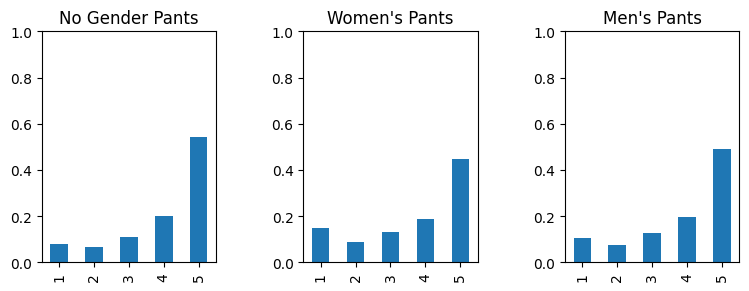

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))

#plt.subplot(1, 3, 1) # row 1, col 2 index 1
no_pants_df['star_rating'].value_counts(normalize=True).sort_index().plot(kind='bar',ylim=(0, 1), ax=ax1)

#plt.subplot(1, 3, 2) #"a 1-row, 3-column figure: go to the second subplot."
girl_pants_df['star_rating'].value_counts(normalize=True).sort_index().plot(kind='bar',ylim=(0, 1) ,ax=ax2)

#plt.subplot(1, 3, 3) # index 3
boy_pants_df['star_rating'].value_counts(normalize=True).sort_index().plot(kind='bar',ylim=(0, 1) ,ax=ax3)

ax1.set_title("No Gender Pants")
ax2.set_title("Women's Pants")
ax3.set_title("Men's Pants")
fig.subplots_adjust(wspace=.5)

plt.show()
plt.tight_layout()
#https://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/how-pandas-uses-matplotlib-plus-figures-axes-and-subplots/

In [ ]:
#girl_pants_df['star_rating'].value_counts(normalize=True).sort_index().plot(kind='bar',figsize=(3, 3),ylim=(0, 1))

In [ ]:
#boy_pants_df['star_rating'].value_counts(normalize=True).plot(kind='bar',figsize=(3, 3),ylim=(0, 1))

# It looks like pants with no gender in product title (e.g. unisex pants) have most percentage of reviews with the highest approval rating 5. Women's pants and Men's pants have a similar distribution, with Women's pants having slightly more reviews with the lowest rating 1 (i.e. more "negative" reviews)

https://github.com/ashleylizg/nlp-tutorial/blob/main/main.ipynb

In [ ]:
#https://ashleygingeleski.com/2021/03/31/sentiment-analysis-of-product-reviews-with-python-using-nltk/